# Business Understanding

## Project Domain

Domain: Astronomy and Artificial Intelligence

Sub-Domain: Stellar Classification

Sistem klasifikasi bintang ini bertujuan untuk mengidentifikasi jenis bintang berdasarkan karakteristik fisiknya. Penggunaannya berguna untuk mendukung studi dan riset di bidang astronomi, seperti memahami populasi bintang, siklus hidup bintang, dan distribusi bintang di galaksi.

## Problem Statements

Masalah yang Dihadapi:
1. Banyaknya Data Bintang:

  *  Dengan kemajuan teknologi teleskop, data bintang yang tersedia terus bertambah, sehingga proses identifikasi secara manual menjadi sulit dan tidak efisien.

2. Kompleksitas Ciri Fisik:

  * Jenis bintang dipengaruhi oleh beberapa karakteristik fisik (suhu, ukuran, luminositas, warna, dan sebagainya), sehingga proses identifikasi menjadi lebih rumit apabila diteruskan secara manual.

3. Kebutuhan Otomatisasi:

  *  Dalam kegiatan observasi dan analisis, dibutuhkan sebuah pendekatan otomatis yang dapat secara cepat dan akurat mengklasifikasikan tipe bintang berdasarkan data yang tersedia.


## Goals

1. **Tujuan Model:**

  *  Mengembangkan model Machine Learning (Neural Network) yang dapat secara akurat mengklasifikasikan tipe bintang berdasarkan karakteristik fisiknya.

  *  Model dapat menerima input berupa ukuran, suhu, luminositas, dan warna bintang, kemudian memberikan output berupa jenis bintang (misalnya Main Sequence, Giant, Dwarf, Supergiant, Hypergiant, White Dwarf).

  * Membangun model AI untuk mengklasifikasikan type bintang dengan akurasi tinggi (>80%).

  * Mengoptimalkan proses identifikasi, sehingga dapat diterapkan pada ukuran data yang besar dan dapat digunakan secara luas, termasuk pada perangkat dengan sumber daya terbatas.

2. **Aplikasi Web:**

  * Dalam bidang astronomi, dapat digunakan untuk menganalisa data bintang secara massal dan menemukan pola atau distribusi tipe bintang di sebuah galaksi.

  * Dalam riset akademik, dapat berguna untuk belajar tentang siklus hidup bintang, menemukan anomali, atau mencari bintang yang unik.

  * Dalam planetarium, dapat dimasukkan pada sebuah website atau aplikasi yang berguna bagi siswa, peneliti, dan masyarakat luas untuk belajar dan mencari informasi berdasarkan karakteristik fisik bintang.



## Solustion Statements

**Machine Learning Model**

  *   **Model**: Menggunakan Artificial Neural Network (ANN) untuk klasifikasi tipe bintang berdasarkan karakteristik fisiknya.

  *  **Fitur**: Dataset menggunakan fitur-fitur seperti suhu (temperature), luminositas, radius, absolute magnitude, dan color.

  * **Output**: 6 kelas bintang.

**Aplikasi Android (Android Studio)**
  * Menggunakan TensorFlow Lite (TFLite) yang nantinya diintegrasikan pada Android Studio.
   
  * Pengguna nantinya dapat:

   -  Menginput karakteristik bintang (suhu, ukuran, luminositas, dan warna) secara manual.

    - Setelah menekan tombol “Prediksi”, aplikasi akan menggunakan TFLite Interpreter untuk menemukan tipe bintang secara instan.

**Optimasi dengan TensorFlow Lite**

  * Model yang telah dilatih di TensorFlow akan dioptimalkan ke dalam format TensorFlow Lite (TFLite) untuk memastikan dapat dijalankan pada perangkat mobile atau perangkat dengan sumber daya terbatas.

# Data Understanding

## Import Data dari Kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"maryamnurazizah","key":"9325e561929898abc6a0daa5c6937c26"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
!kaggle datasets download -d deepu1109/star-dataset

Dataset URL: https://www.kaggle.com/datasets/deepu1109/star-dataset
License(s): copyright-authors
  0% 0.00/3.16k [00:00<?, ?B/s]
100% 3.16k/3.16k [00:00<00:00, 16.2MB/s]


In [8]:
!mkdir star-dataset
!unzip star-dataset -d star-dataset
!ls star-dataset

Archive:  star-dataset.zip
  inflating: star-dataset/6 class csv.csv  
'6 class csv.csv'


## Import Library yang dibutuhkan

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [11]:
df = pd.read_csv('/content/star-dataset/6 class.csv')

In [12]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


<ipython-input-14-1004701403>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Star type', data=df, palette='viridis')


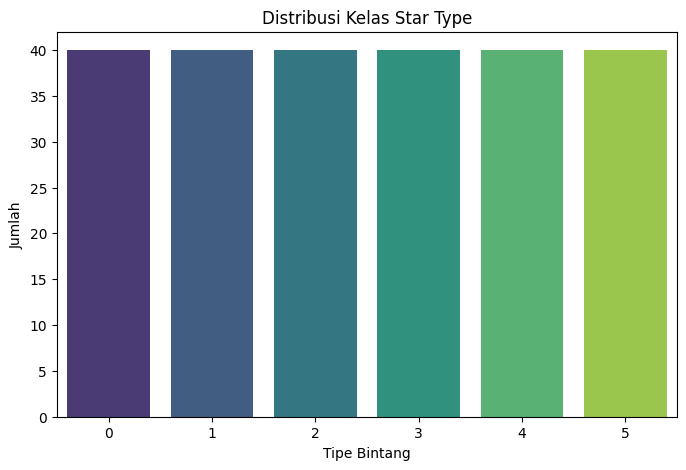

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Star type', data=df, palette='viridis')
plt.title('Distribusi Kelas Star Type')
plt.xlabel('Tipe Bintang')
plt.ylabel('Jumlah')
plt.show()


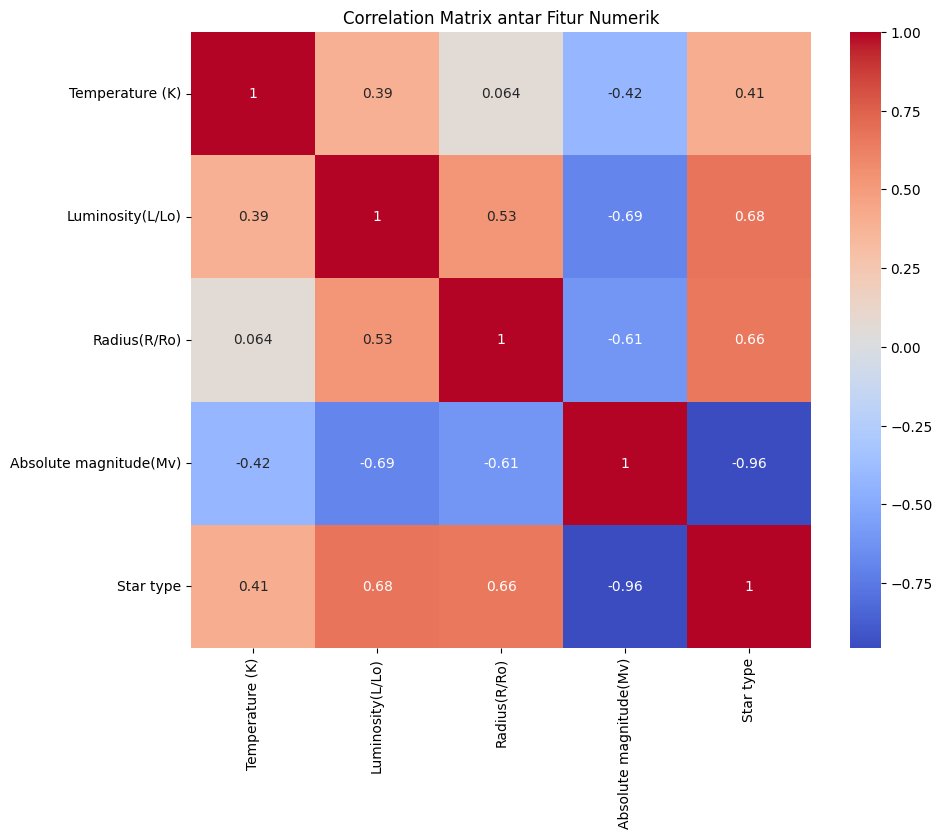

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix antar Fitur Numerik')
plt.show()


<ipython-input-16-1972763249>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Star type', y='Temperature (K)', data=df, palette='magma')


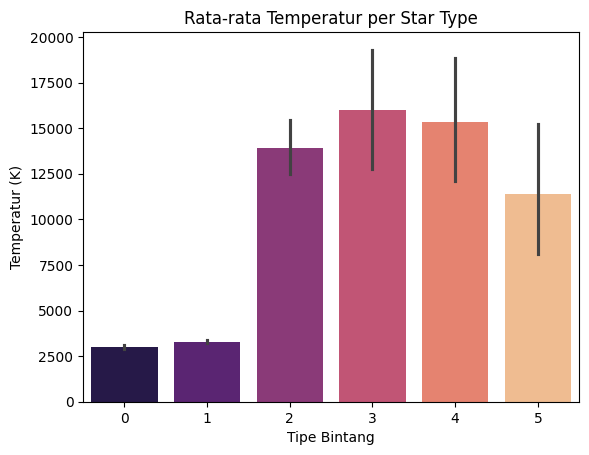

In [16]:
sns.barplot(x='Star type', y='Temperature (K)', data=df, palette='magma')
plt.title('Rata-rata Temperatur per Star Type')
plt.xlabel('Tipe Bintang')
plt.ylabel('Temperatur (K)')
plt.show()


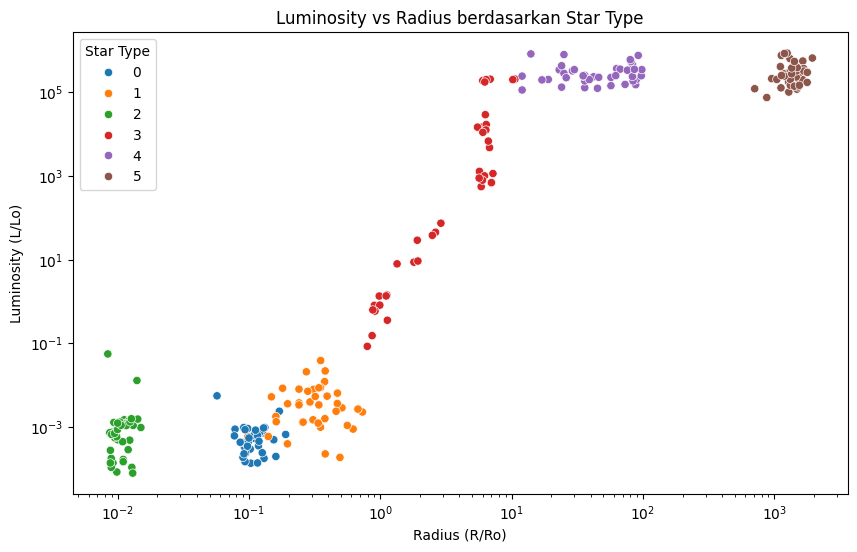

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Luminosity(L/Lo)', hue='Star type', palette='tab10')
plt.title('Luminosity vs Radius berdasarkan Star Type')
plt.xlabel('Radius (R/Ro)')
plt.ylabel('Luminosity (L/Lo)')
plt.yscale('log')  # karena luminosity skala besar
plt.xscale('log')
plt.legend(title='Star Type')
plt.show()


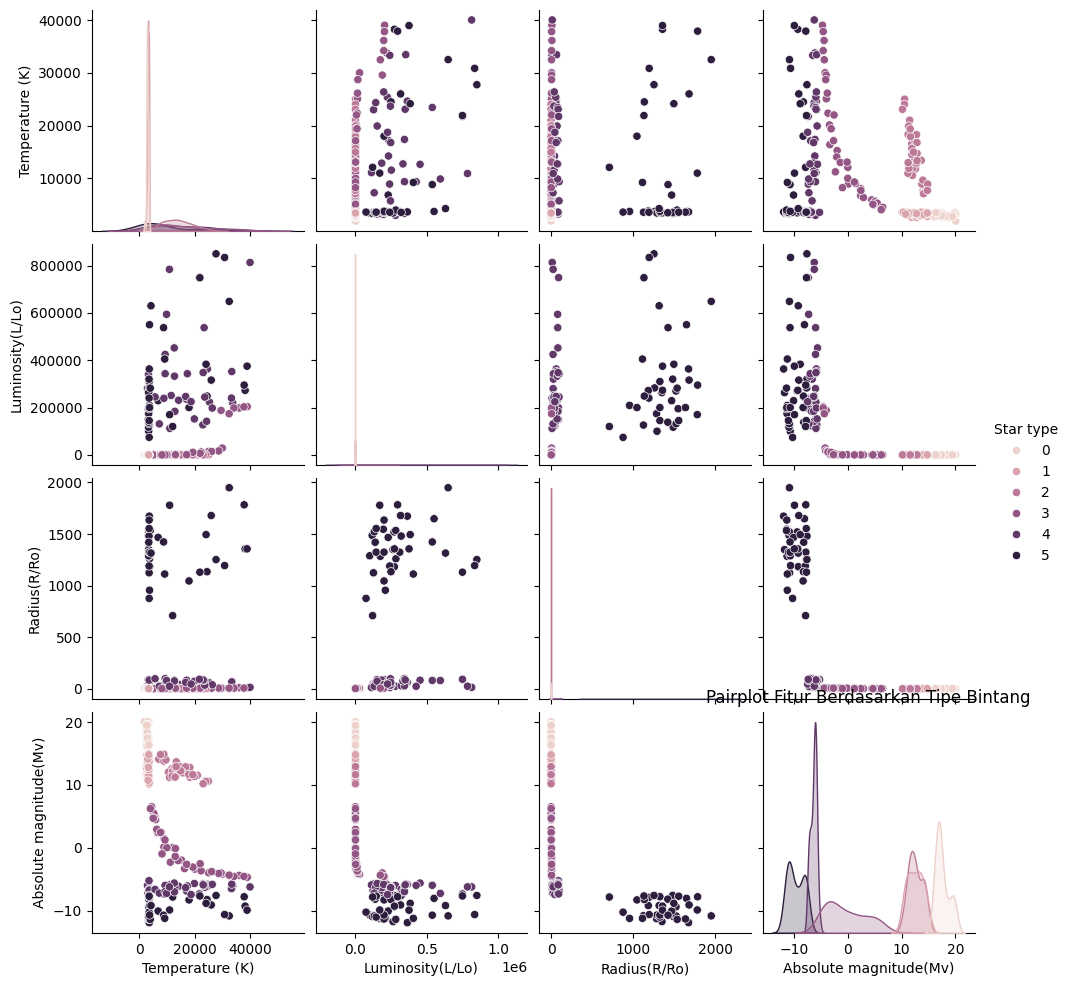

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Star type')
plt.title('Pairplot Fitur Berdasarkan Tipe Bintang')
plt.show()

# Data Preparation

In [19]:
# Encode categorical
df = pd.get_dummies(df, columns=["Star color", "Spectral Class"])

In [20]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3042,0.000500,0.1542,16.60,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2600,0.000300,0.1020,18.70,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2800,0.000200,0.1600,16.65,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1939,0.000138,0.1030,20.06,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [21]:
# pisahkan fitur dan target
X = df.drop("Star type", axis=1)
y = df["Star type"]

In [22]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [23]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [25]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [26]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,502 (56.65 KB)

 Trainable params: 14,502 (56.65 KB)

 Non-trainable params: 0 (0.00 B)

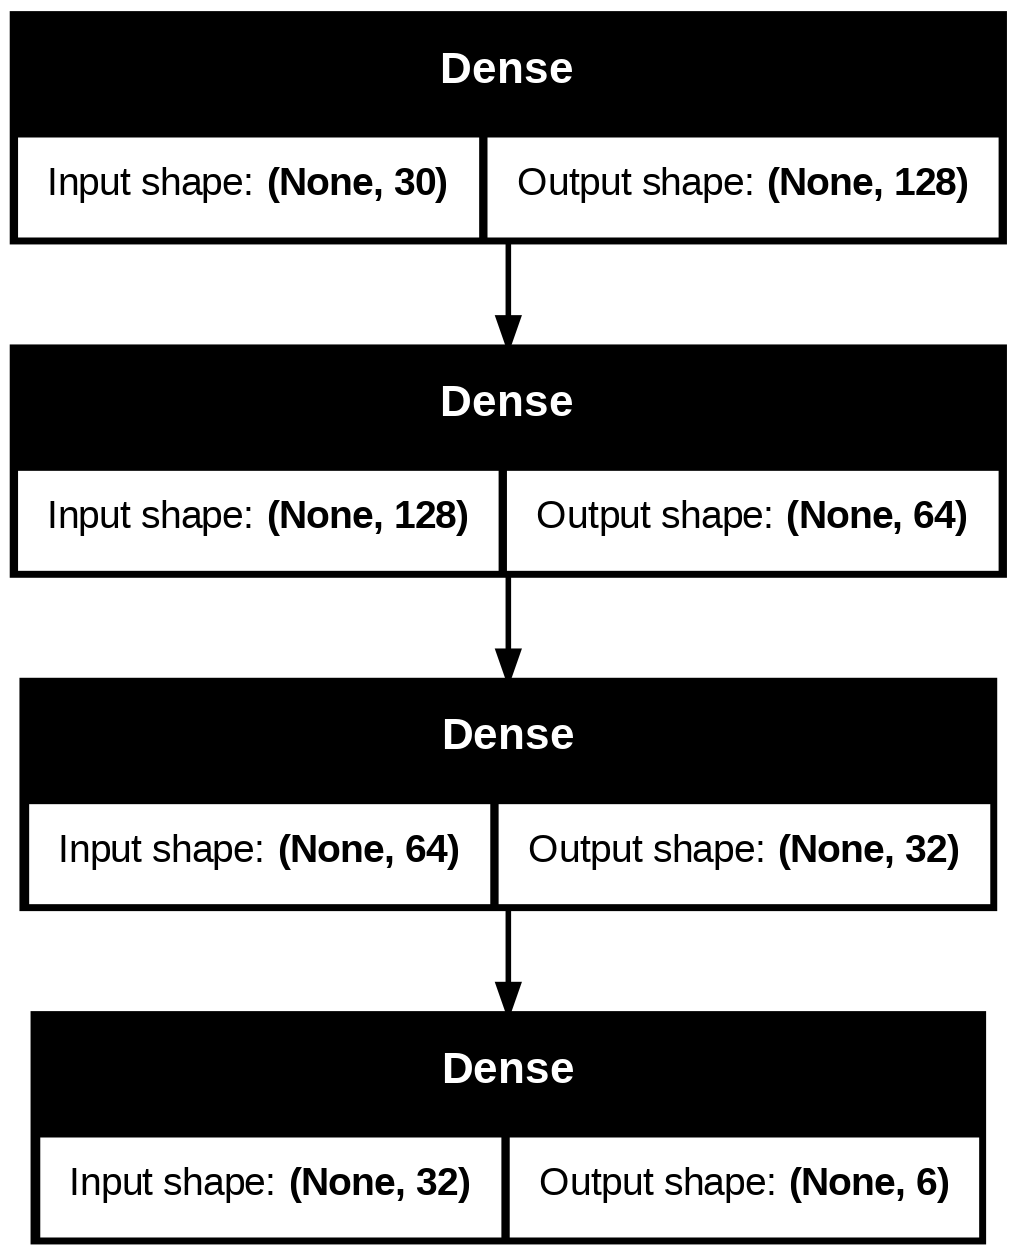

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2995 - loss: 1.7608 - val_accuracy: 0.6042 - val_loss: 1.6492
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5868 - loss: 1.6107 - val_accuracy: 0.6875 - val_loss: 1.4986
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6229 - loss: 1.4625 - val_accuracy: 0.7083 - val_loss: 1.3074
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6663 - loss: 1.2597 - val_accuracy: 0.7292 - val_loss: 1.0733
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7164 - loss: 1.0519 - val_accuracy: 0.7917 - val_loss: 0.8246
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7694 - loss: 0.8185 - val_accuracy: 0.8125 - val_loss: 0.6092
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8483 - loss: 0.6067 - val_accuracy: 0.9375 - val_loss: 0.4611
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9026 - loss: 0.4652 - val_accuracy: 0.8750 - val_loss

# Evaluation

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9514 - loss: 0.2820 
Akurasi Model: 0.9583
Loss Model: 0.2847


In [31]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

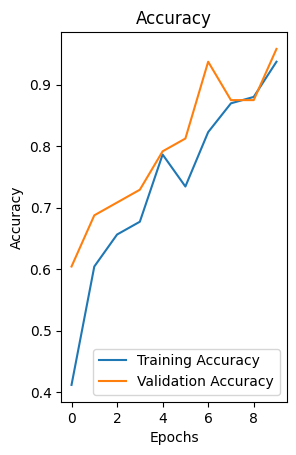

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

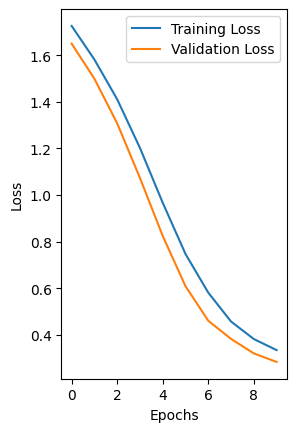

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


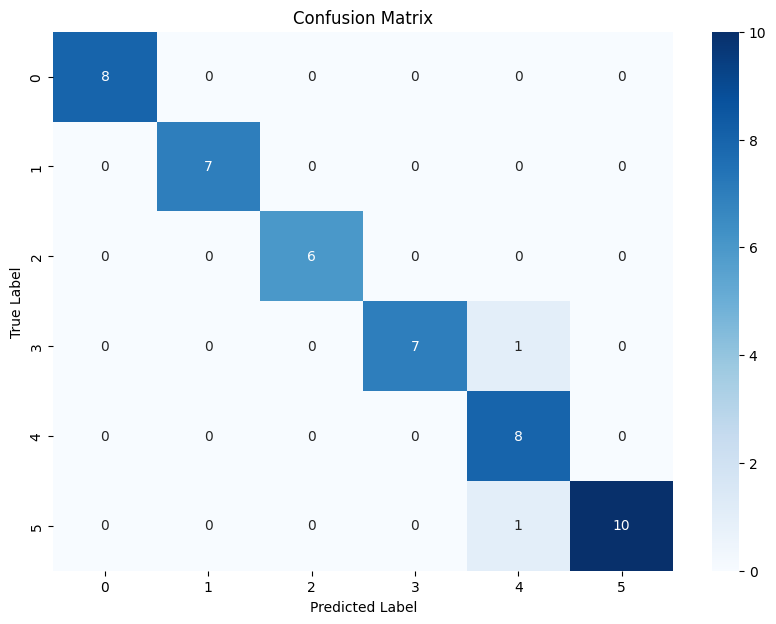

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.80      1.00      0.89         8
           5       1.00      0.91      0.95        11

    accuracy                           0.96        48
   macro avg       0.97      0.96      0.96        48
weighted avg       0.97      0.96      0.96        48



In [34]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [35]:
# Simulasi
all_dummy_cols = X.columns
sample_data = {col: 0 for col in all_dummy_cols}

sample_data.update({
    'Temperature (K)': 5500,
    'Luminosity(L/Lo)': 1.2,
    'Radius(R/Ro)': 1.1,
    'Absolute magnitude(Mv)': 5.5,
    'Star color_White': 1,
    'Spectral Class_A': 1
})

# Create the sample DataFrame ensuring all columns in X are present
sample_df = pd.DataFrame([sample_data])
sample_df = sample_df[X.columns]

# Scaling
sample_scaled = scaler.transform(sample_df)

# Prediksi
prediction = model.predict(sample_scaled)
predicted_class = np.argmax(prediction, axis=1)[0]
print("Prediksi Tipe Bintang:", le.inverse_transform([predicted_class])[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediksi Tipe Bintang: 2


## Save Model

In [36]:
# Simpan model h5
model.save('./startype.h5')

# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Simpan model TFLite
with open('startype.tflite', 'wb') as f:
    f.write(tflite_model)

# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

Saved artifact at '/tmp/tmpr22pq2ns'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  139027331499408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027327703696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331505936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331507856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331501712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331500368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331504784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139027331508048: TensorSpec(shape=(), dtype=tf.resource, name=None)


['scaler.pkl']